# TME 5 : La transformée de Fourier discrète (DFT)

> Consignes: le fichier TME_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME5_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! ...
Pour chaque questions, écrivez des commentaires brefs et concis lorsque demandé dans les cases **Commentaires**.

In [1]:
# Chargement des modules et des données utiles.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from pylab import *

# charger les images et les convertir en tableau de int
image_sinus1 = np.array(Image.open("images/sinus1.png"),dtype='int32') 
image_sinus2 = np.array(Image.open("images/sinus2.png"),dtype='int32')
image_sinus3 = np.array(Image.open("images/sinus3.png"),dtype='int32')
image_sinrot = np.array(Image.open("images/sinrot.png"),dtype='int32')
image_gaussienne = np.array(Image.open("images/gaussienne.png"),dtype='int32')
image_rectangle = np.array(Image.open("images/rectangle.png"),dtype='int32')
image_rotate = np.array(Image.open("images/rotate.png"),dtype='int32')
image_texture1 = np.array(Image.open("images/texture1.png"),dtype='int32')
image_texture2 = np.array(Image.open("images/texture2.png"),dtype='int32')
image_h = np.array(Image.open("images/h.png"),dtype='int32')
image_pulse = np.array(Image.open("images/pulse.png"),dtype='int32')
image_passe_bas = np.array(Image.open("images/passe_bas.png"),dtype='int32')
image_passe_haut = np.array(Image.open("images/passe_haut.png"),dtype='int32')
image_passe_bande = np.array(Image.open("images/passe_bande.png"),dtype='int32')

def affichage_14(affichages,titres=None):
    # effectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    # paramètres :
    #  - liste des affichages (entre 1 et 4)
    #  - liste des titres (entre 1 et 4, autant que de affichages) Optionnelle
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plt.plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    
def module_affichage(module):
    # permet de transformer un module de DFT en une version jolie à afficher
    module = np.array(module, dtype='float32')
    ind_max = np.where(module == np.max(module.flatten()))
    module[ind_max]=0.0
    module[ind_max]=np.max(module.flatten())
    module = sqrt(module)
    return sqrt(module)

### Exercice 1 — DFT d’une sinusoïde 2D

Cet exercice est le prolongement de l’exercice 2 du TD 5. On s'intéresse ici au résultat de la transformée de Fourier discrète (rapide) des images ```sinus1.png```, ```sinus2.png``` et ```sinus3.png```.

**Note** : pour afficher une série d'images et/ou de courbes (entre 1 et 4) avec un titre (optionnel), utilisez la fonction ```affichage_14()```. Spécifiez à cette fonction une liste d'images (tableau numpy 2D) et/ou de courbes (tableau numpy 1D) et la liste (optionnelle) correspondante des titres à afficher comme ci-dessous :

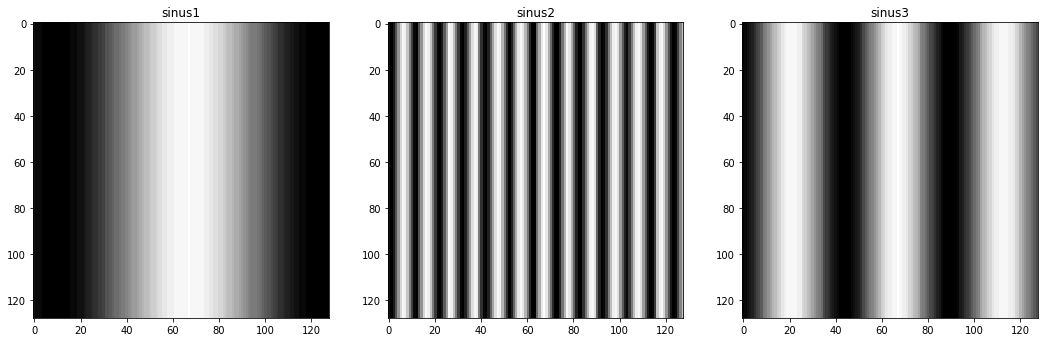

In [2]:
affichage_14([image_sinus1,image_sinus2,image_sinus3],['sinus1','sinus2','sinus3'])

### Question 1

Calcul de la DFT de l'image ```sinus1.png``` sous la forme module/phase.

1. Caculez la DFT non centrée de sinus1.png avec la fonction ```fft2()```
2. Visualisez les parties réelle et imaginaire de la DFT non centrées avec les fonctions ```real()``` et ```imag()``` 
3. Centrez la DFT avec ```fftshift()``` et visualiser le module et la phase de la DFT centrée avec les fonctions ```abs()``` et ```arctan2()```


**Note:** Par la suite utilisez la fonction ```module_affichage()``` pour une meilleure visualisation des modules (uniquement). Cette fonction prend un module de DFT centrée et retourne une version du module qui s'affiche mieux. En effet sinon les valeurs hautes du modules rendent invisibles les valeurs faibles sur l'image


### **Commentaires :**
(voir https://rmarkdown.rstudio.com/authoring_basics.html pour un rapide résumé du langage Markdown)

Vos commentaires ici, ***Markdown*** et formules LaTeX possibles : $z=x+iy$, ...



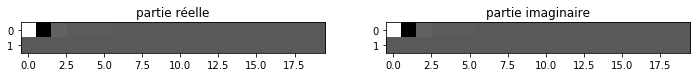

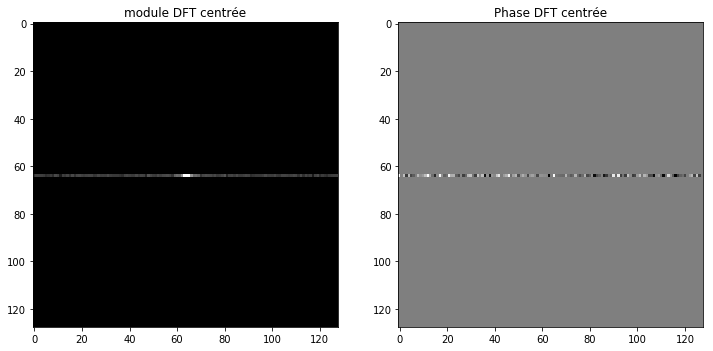

In [3]:
# DFT sinus1
fft2_sinus1 = fft2(image_sinus1)

# partie réelle et imaginaire 
real_sinus1 = real(fft2_sinus1)
imag_sinus1 = imag(fft2_sinus1)

# module et phase
fft2_sinus1_c = fftshift(fft2_sinus1)
module_sinus1 = abs(fft2_sinus1_c)

real_sinus2 = real(fft2_sinus1_c)
imag_sinus2 = imag(fft2_sinus1_c)

phase_sinus1 = arctan2(imag_sinus2,real_sinus2)

# visualisation
affichage_14([real_sinus1[0:2,0:20],real_sinus1[0:2,0:20]],['partie réelle','partie imaginaire'])
affichage_14([module_affichage(module_sinus1),phase_sinus1],['module DFT centrée','Phase DFT centrée'])




### Question 2 :

On va s'intéresser au module de la DFT centrée. **Note:** N'oubliez pas de toujours utiliser ```module_affichage(image_module)``` pour afficher les images modules à l'écran avec la fonction ```affichage_14()```.

1. Codez une fonction ```module_fft_c()``` qui renvoie le module de la DFT centrée d'une image.
2. Remarquez l'emplacement des coefficients non nuls dans l'image du module de la DFT centrée de sinus1.png. Où sont-ils situés ?  Extrayez ces coefficient et tracez les avec la fonction ```affichage_14()```. **Note :** Vous pouvez extraires les coefficients en prenant la ligne correspondante dans l'image de module ou bien en prenant simplement les coefficients non nuls de l'image avec ```coeffs = image[image>0]```
3. Répétez ces opérations sur les images sinus2.png et sinus3.png : affichez les images des modules et tracez les coefficients non nuls

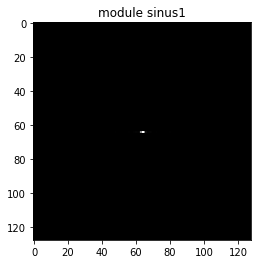

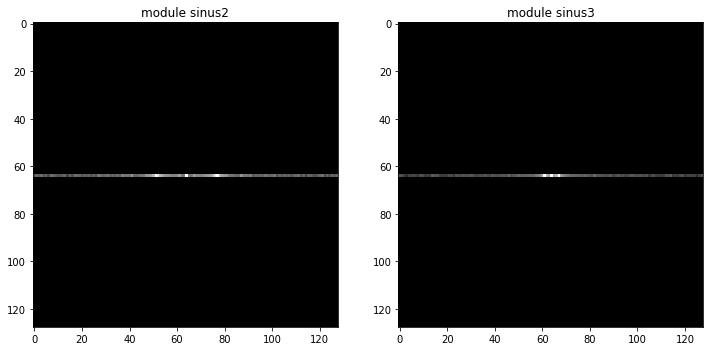

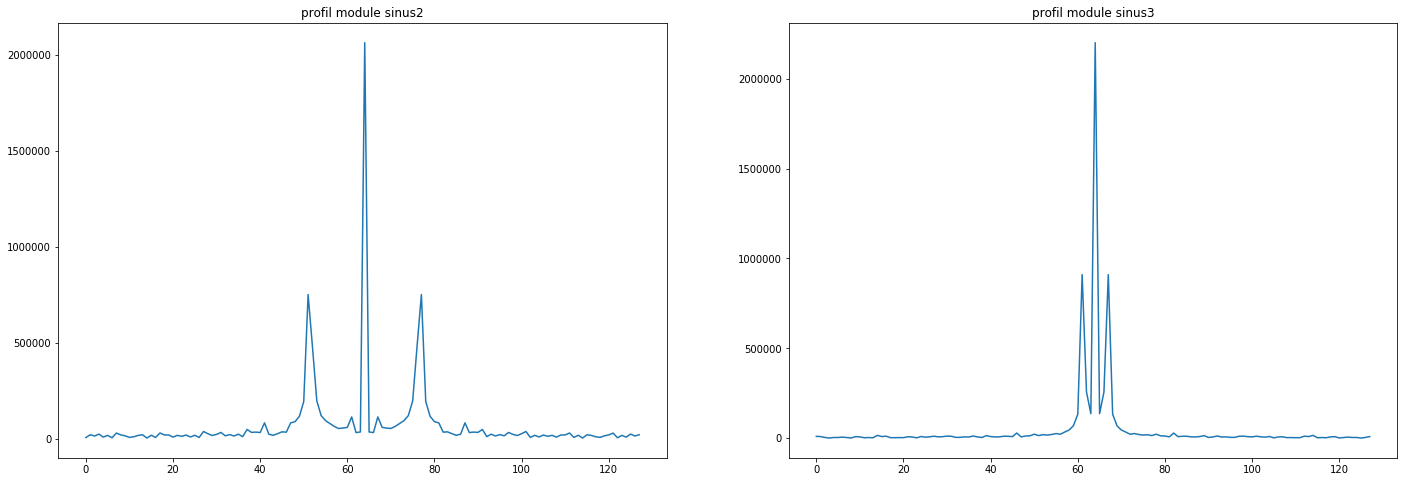

In [4]:
def module_fft_c(image):    
    fft2_image = fft2(image)
    fft2_image_c = fftshift(fft2_image)
    module_image = abs(fft2_image_c)
    return module_image

module_image = module_fft_c(image_sinus1)

affichage_14(module_image , 'module sinus1')

module_sinus2 = module_fft_c(image_sinus2)
module_sinus3 = module_fft_c(image_sinus3)

coeffs2 = module_sinus2[module_sinus2>0]
coeffs3 = module_sinus3[module_sinus3>0]

affichage_14( [module_affichage(module_sinus2),module_affichage(module_sinus3)], ['module sinus2','module sinus3'])
affichage_14( [coeffs2 ,coeffs3], ['profil module sinus2','profil module sinus3'])

## Exercice 2 : Quelques DFT d’images simples

1. **DFT d'une sinusoïde diagonale:** Affichez l'image sinrot.png ainsi que le module de sa DFT centrée et commentez.

2. **DFT d'une gaussienne:** Affichez l'image gaussienne.png à côté du module de sa DFT centrée.  
Puis choisissez la ligne ou la colonne du milieu dans les deux images et comparez leurs profils. Commentez.

### **Commentaires :**

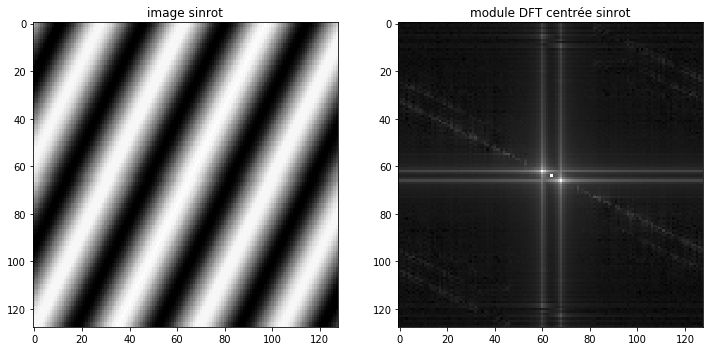

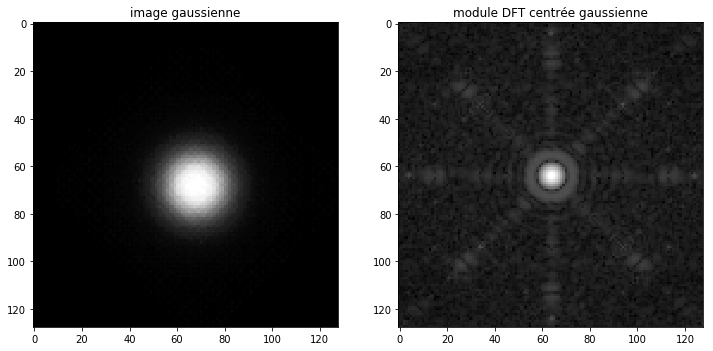

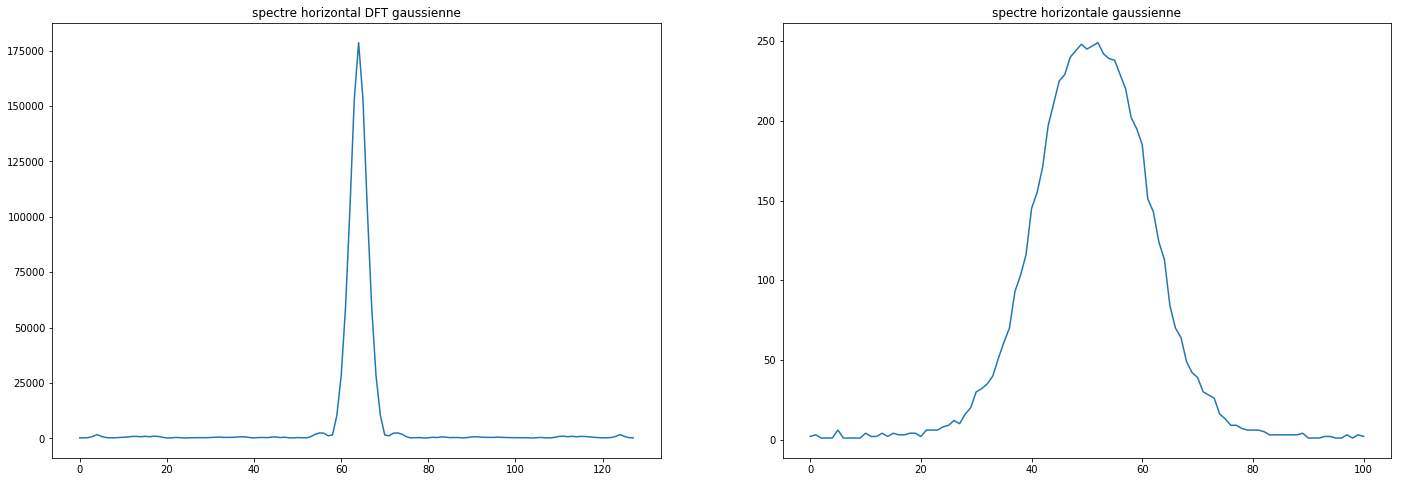

In [5]:
module_fft_sinrot = module_fft_c(image_sinrot)
affichage_14( [image_sinrot, module_affichage(module_fft_sinrot)], ['image sinrot', 'module DFT centrée sinrot'])



module_fft_gaussienne = module_fft_c(image_gaussienne)
affichage_14( [image_gaussienne, module_affichage(module_fft_gaussienne)], ['image gaussienne', 'module DFT centrée gaussienne'])

n = int(module_fft_gaussienne.shape[0]/2)

module_fft_gaussienne = module_fft_gaussienne[n,:]
image_gaussienne = image_gaussienne[n,:]

coeffsModuleGauss = module_fft_gaussienne[module_fft_gaussienne>0]
coeffsImageGauss = image_gaussienne[image_gaussienne>0]

affichage_14( [coeffsModuleGauss, coeffsImageGauss], ['spectre horizontal DFT gaussienne', 'spectre horizontale gaussienne'])

## Exercice 3 : Propriétés de la DFT

Cet exercice se propose de mettre en avant certaines propriétés de la DFT :

1. Observer et interprétez le module de la DFT centrée de l’image rectangle.png. On tracera le profil de niveaux de gris sur la ligne 65.
2. Observez et interprétez le module de la DFT centrée de l’image rotate.png. Cette image correspond à la précédente, après rotation de 30 degrés.
3. Effectuez la somme des deux images précédentes en utilisant la fonction ```somme_images()```. Observez et interprétez le module de la DFT centrée de l’image résultat.


### **Commentaires :**

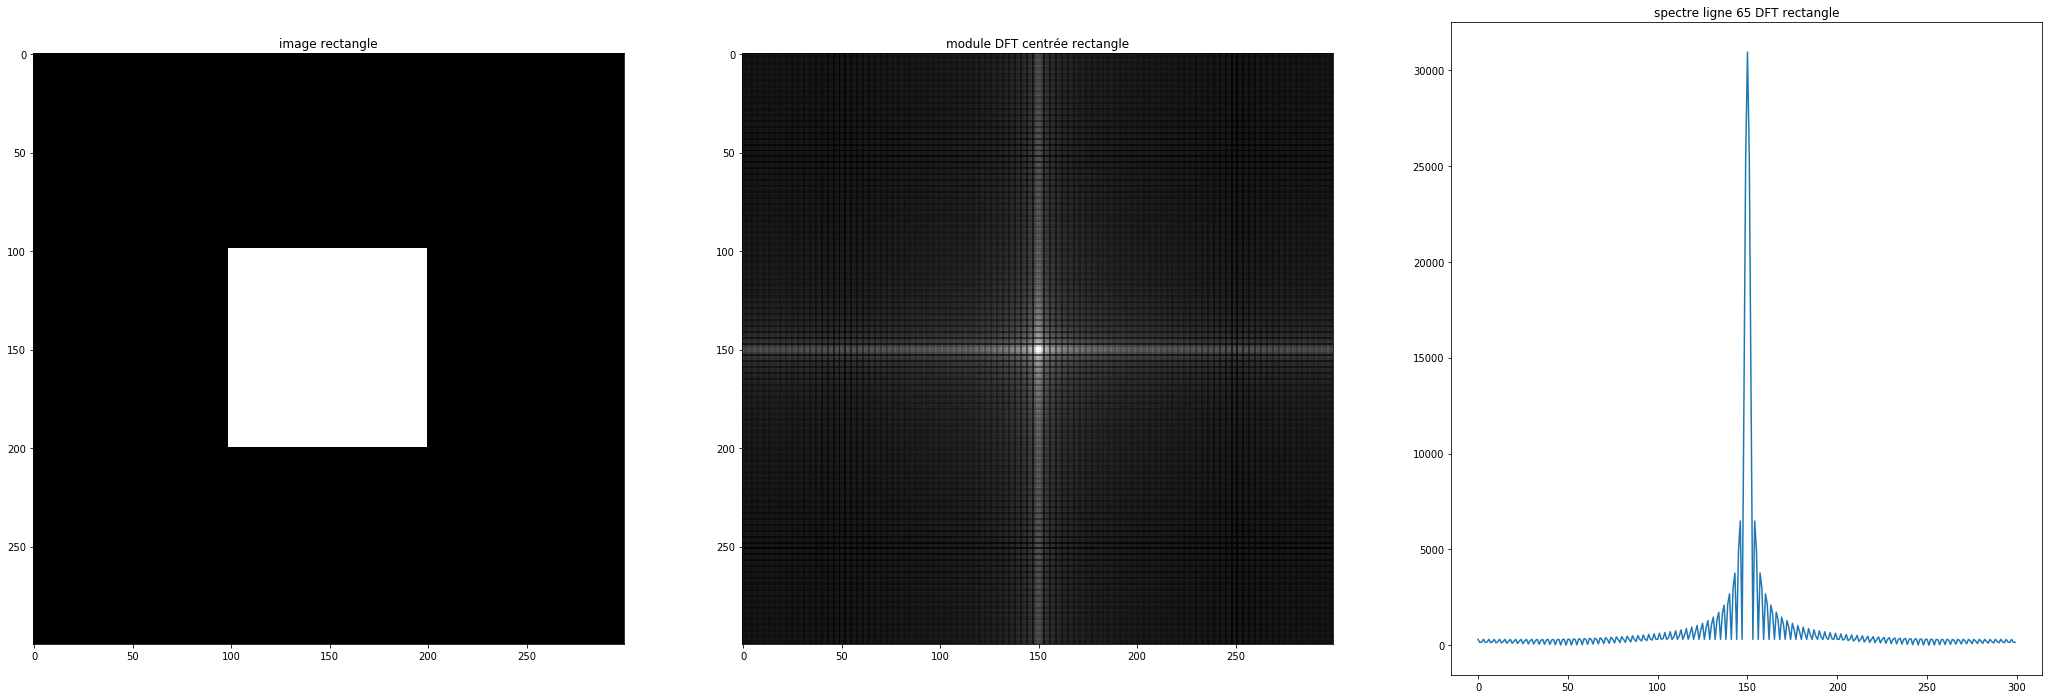

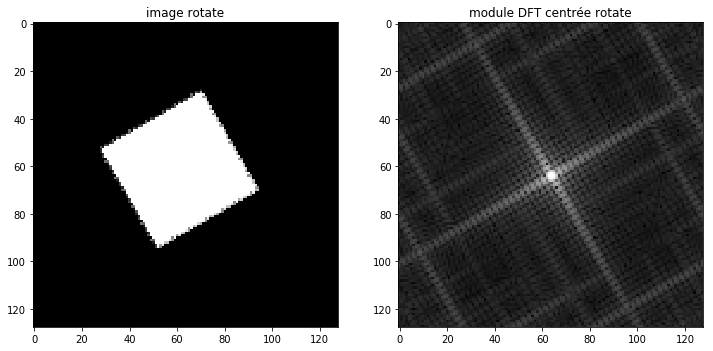

86
214
86
214


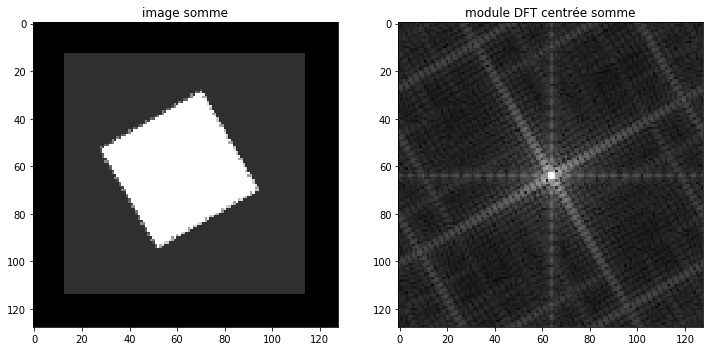

In [6]:
def somme_images(img1,img2):
    # convert to float
    img1 = np.array(img1, dtype='float32')
    img2 = np.array(img2, dtype='float32')
    # rescale :
    img1 /= np.sum(img1)
    img2 /= np.sum(img2)
    return img1 + img2

module_fft_rectangle = module_fft_c(image_rectangle)
module_fft_rectangle65 = module_fft_rectangle[65,:]
affichage_14( [image_rectangle, module_affichage(module_fft_rectangle),module_fft_rectangle65[module_fft_rectangle65>0]], ['image rectangle', 'module DFT centrée rectangle','spectre ligne 65 DFT rectangle'])

module_fft_rotate = module_fft_c(image_rotate)
affichage_14( [image_rotate, module_affichage(module_fft_rotate)], ['image rotate', 'module DFT centrée rotate'])

n1 = (int)((image_rectangle.shape[0]-image_rotate.shape[0])/2)
m1 = (int)((image_rectangle.shape[0]-image_rotate.shape[0])/2+image_rotate.shape[0])
n2 = (int)((image_rectangle.shape[1]-image_rotate.shape[1])/2)
m2 = (int)((image_rectangle.shape[1]-image_rotate.shape[1])/2+image_rotate.shape[1])

print(n1)
print(m1)
print(n2)
print(m2)

image_rectangleTaille = image_rectangle[n1:m1,n2:m2]
image_somme = somme_images(image_rectangleTaille, image_rotate)
module_fft_somme = module_fft_c(image_somme)
affichage_14( [image_somme, module_affichage(module_fft_somme)], ['image somme', 'module DFT centrée somme'])

## Exercice 4 : Compréhension de spectres

Affichez les images ```texture1.png```, ```texture2.png```, ```h.png``` et leurs DFT. Commentez les DFT.

### **Commentaires :**

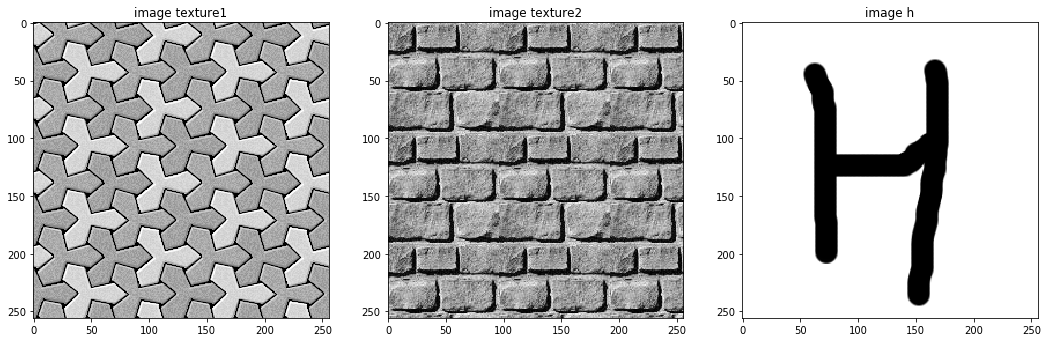

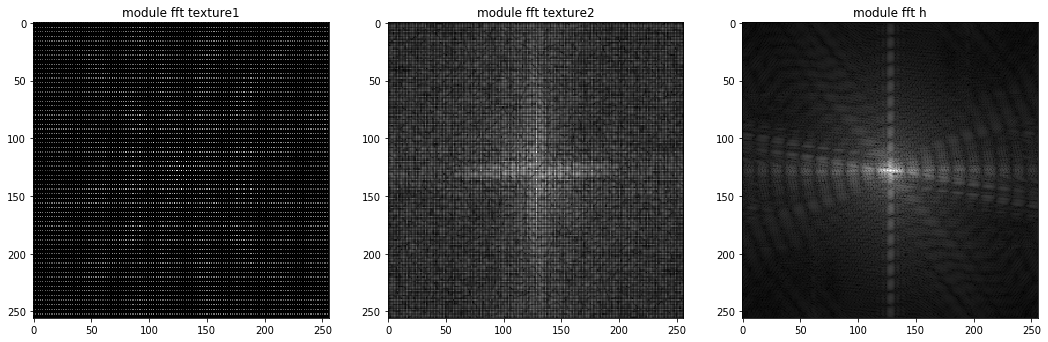

In [7]:
affichage_14( [image_texture1, image_texture2, image_h], ['image texture1', 'image texture2','image h'])
module_fft_texture1 = module_fft_c(image_texture1)
module_fft_texture2 = module_fft_c(image_texture2)
module_fft_h = module_fft_c(image_h)
affichage_14( [module_affichage(module_fft_texture1), module_affichage(module_fft_texture2), module_affichage(module_fft_h)], ['module fft texture1', 'module fft texture2','module fft h'])

## Exercice 5 : Filtrage dans le domaine fréquentiel


1. Observez l’image ```pulse.png```. À quel signal (bidimensionnel) correspond-elle ? Observez le spectre de sa DFT centrée. Interprétez le résultat.
2. Observez l’image ```passe_bas.png```. Cette image correspond en fait a la réponse fréquentielle d’un filtre passe-bas idéal ```PB```. À quoi le voit-on ? Tracez ce profil et celui de la DFT (même colonne) précédente.
3. Soit ```A = image_pulse```. Calculez $DFT(A) \times PB$ et interpréter le résultat obtenu en affichant le module de cette image.
4. Calculez la DFT inverse (fonction ```ifft2()```) en utilisant l'image  $DFT(A) \times PB$  afin d’obtenir l’image reconstruite ```A′```. Visualisez et interprétez le module de cette image ainsi que la courbe de profil obtenue à partir d'une de ses lignes. Commentez.
5. Effectuer les étapes 1, 2 et 3 avec les filtres suivants : ```passe_haut.png``` et ```passe_bande.png```, respectivement les réponses fréquentielle d’un filtre passe-haut ```PH``` et d’un filtre passe-bande ```PB```.

### **Commentaires :**

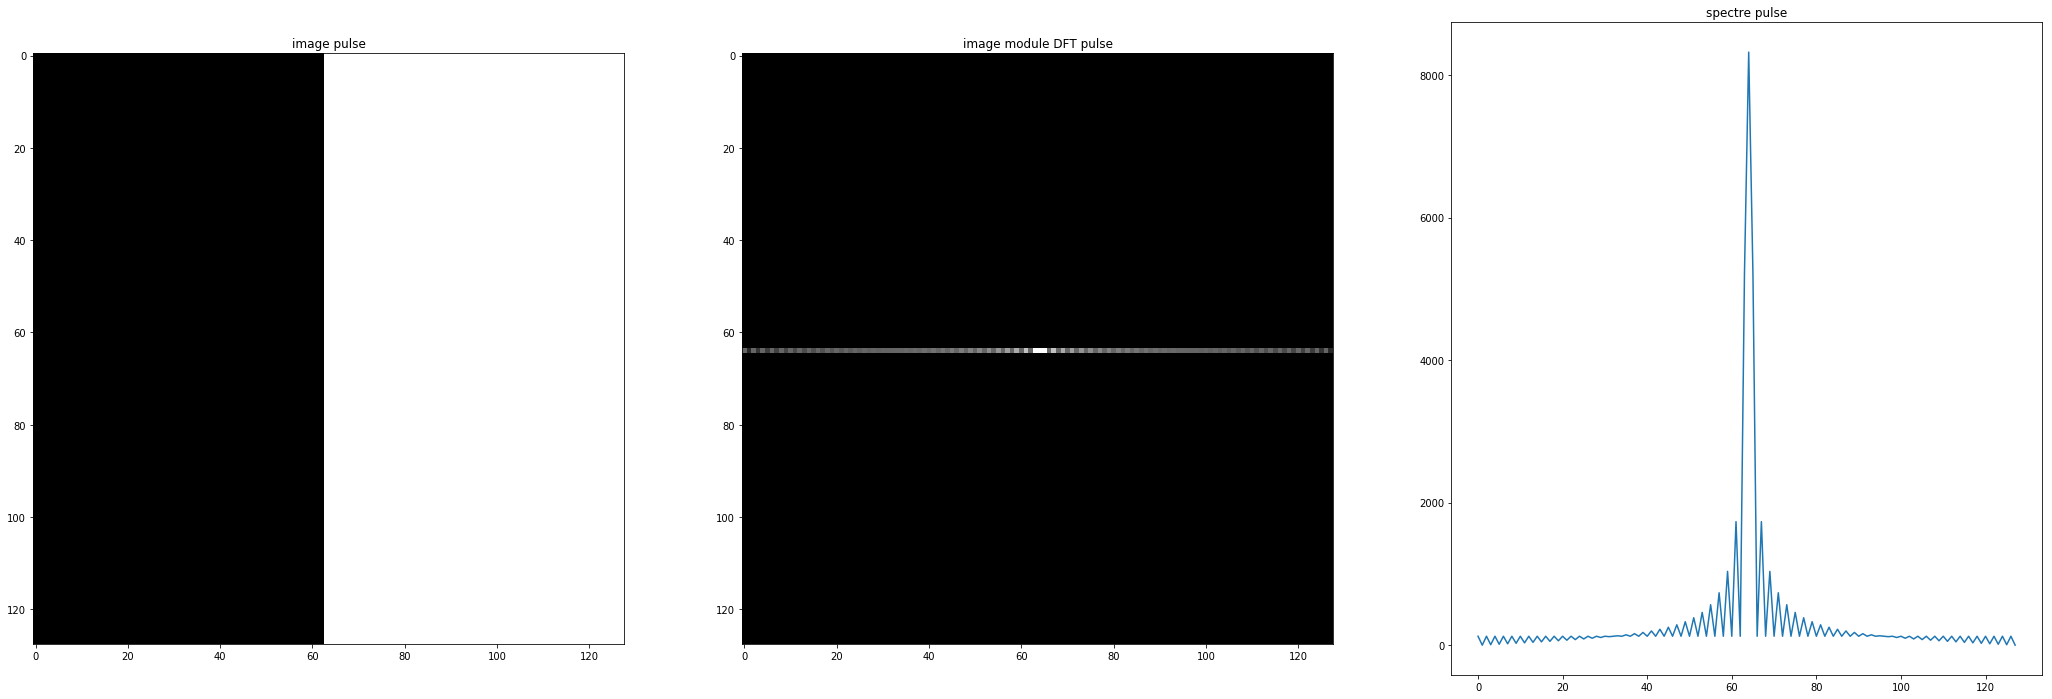

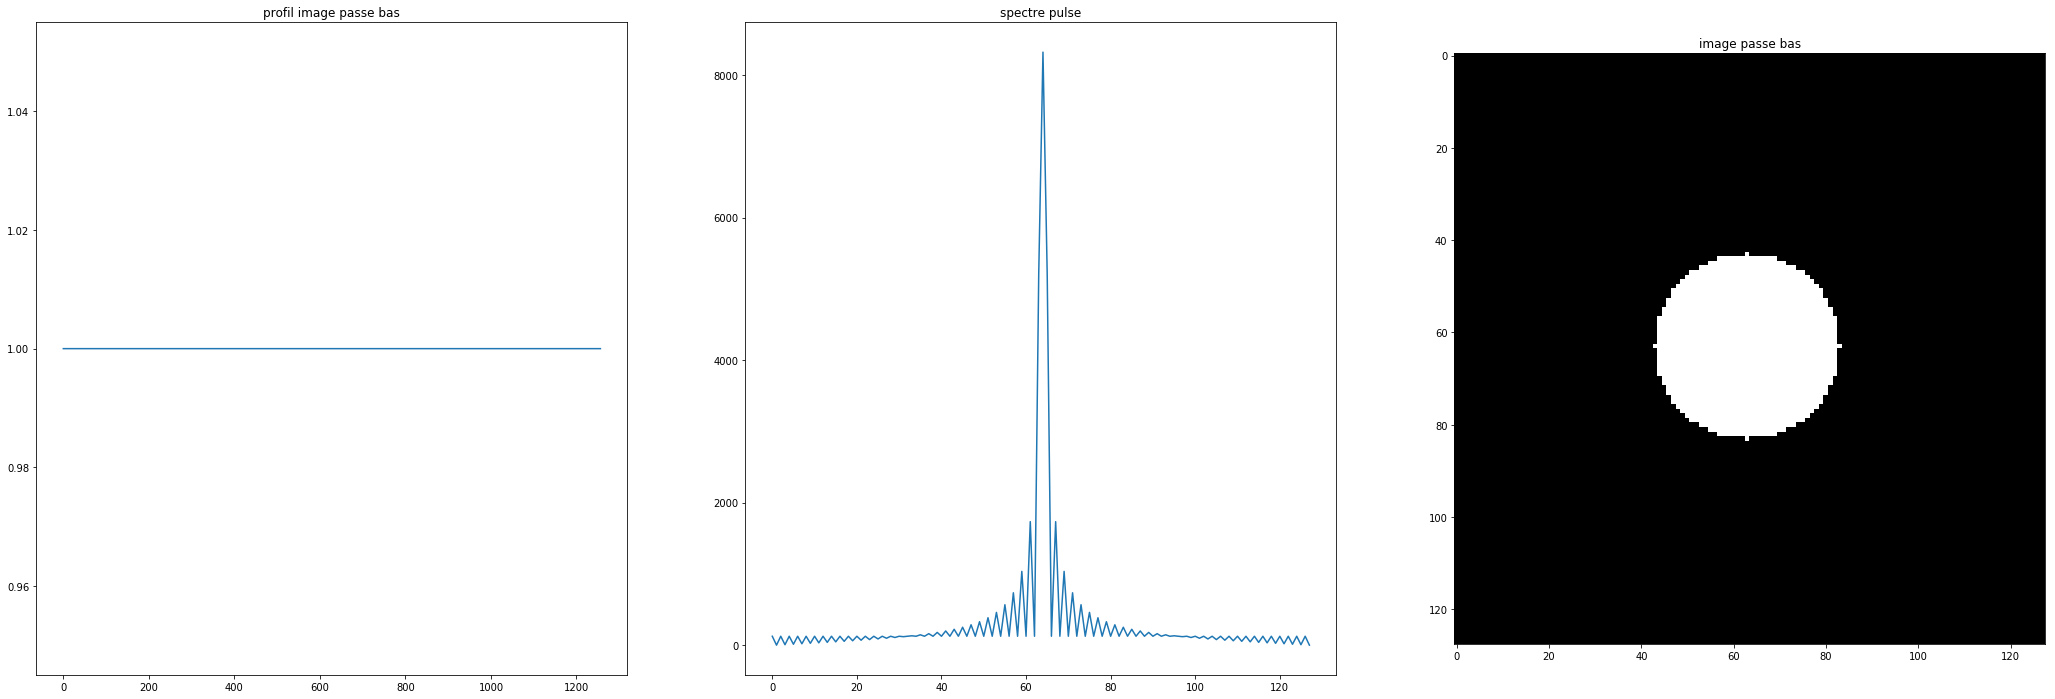

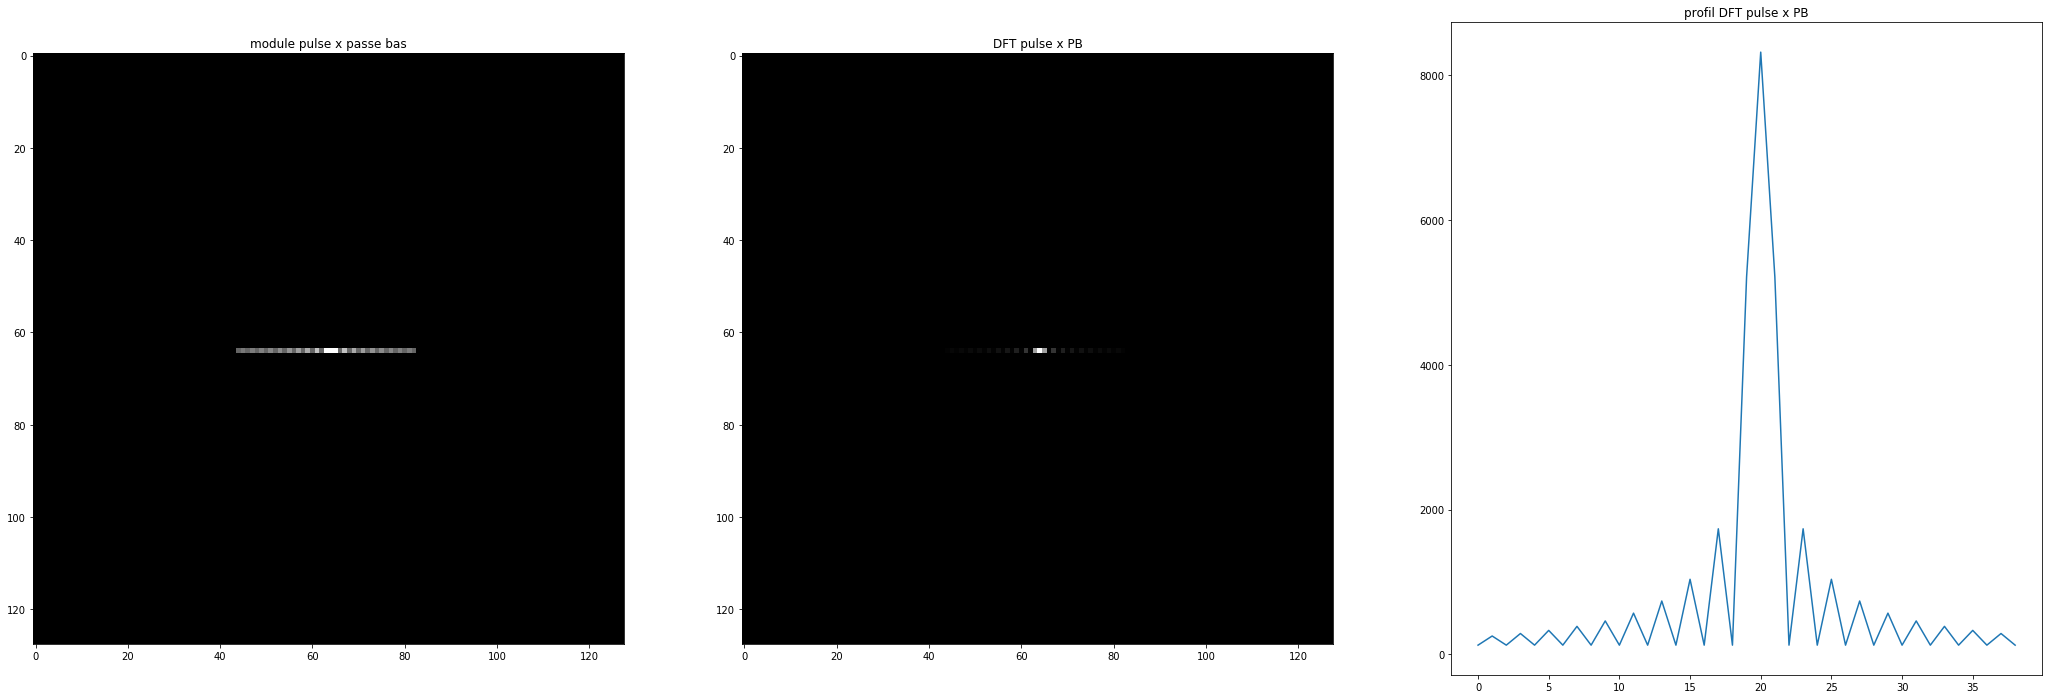

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


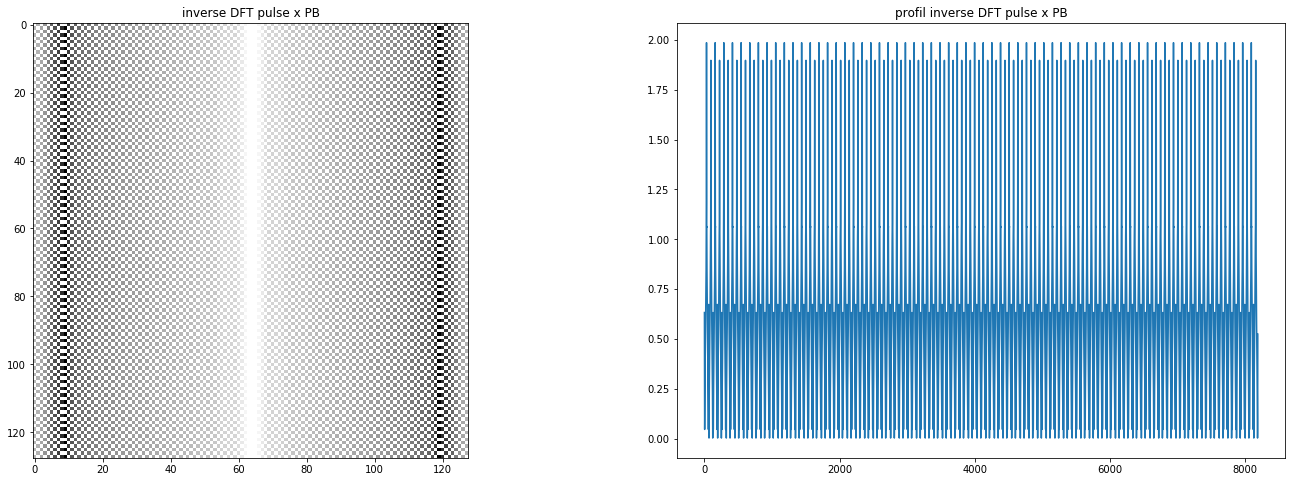

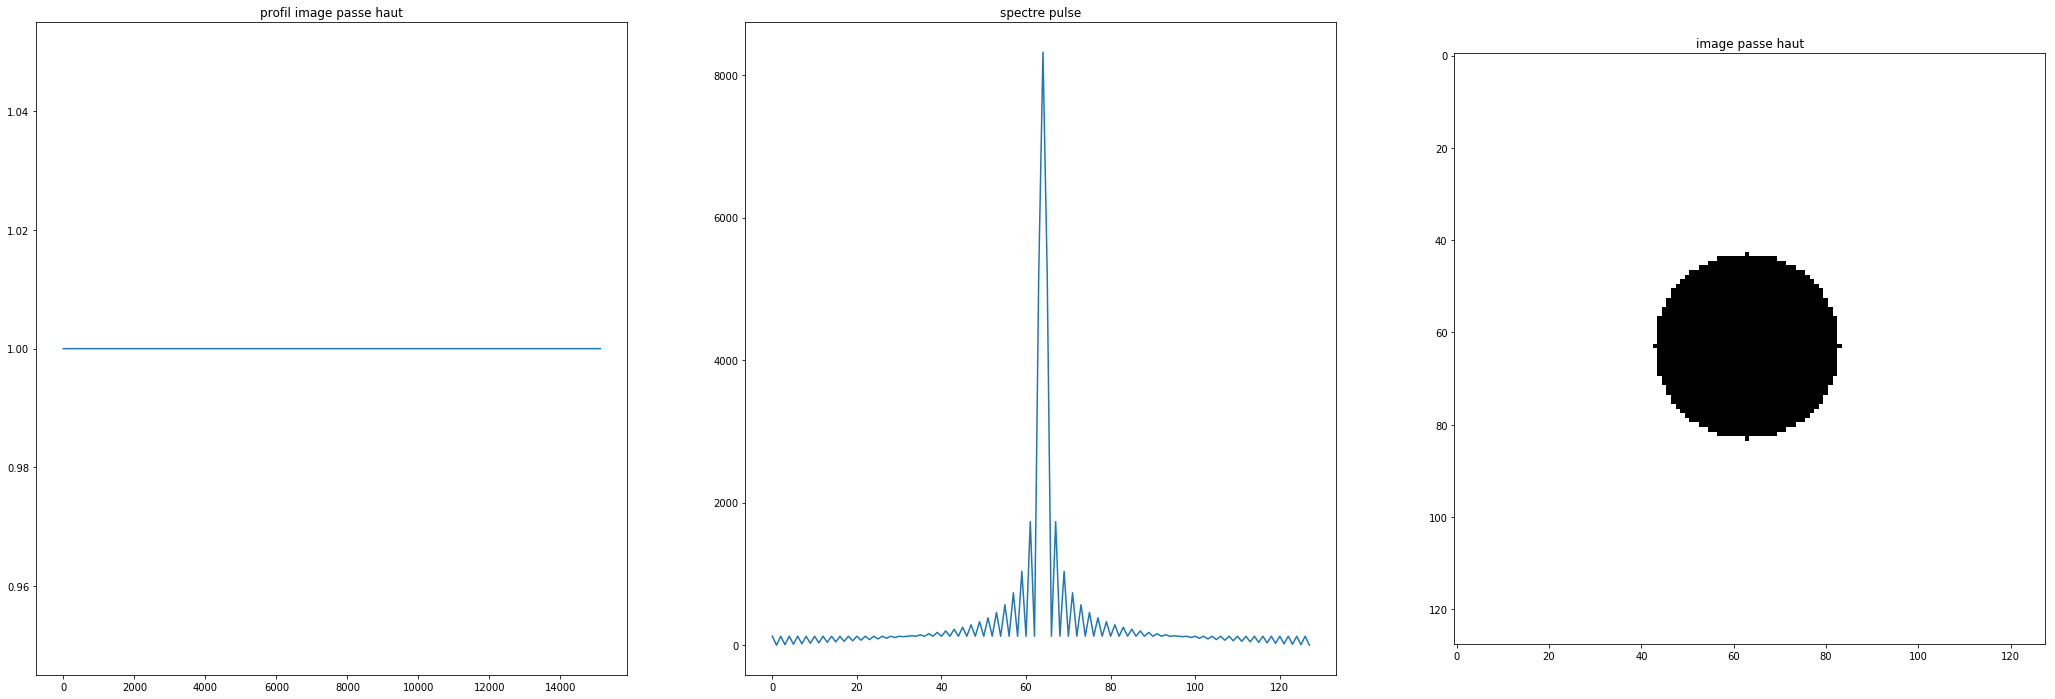

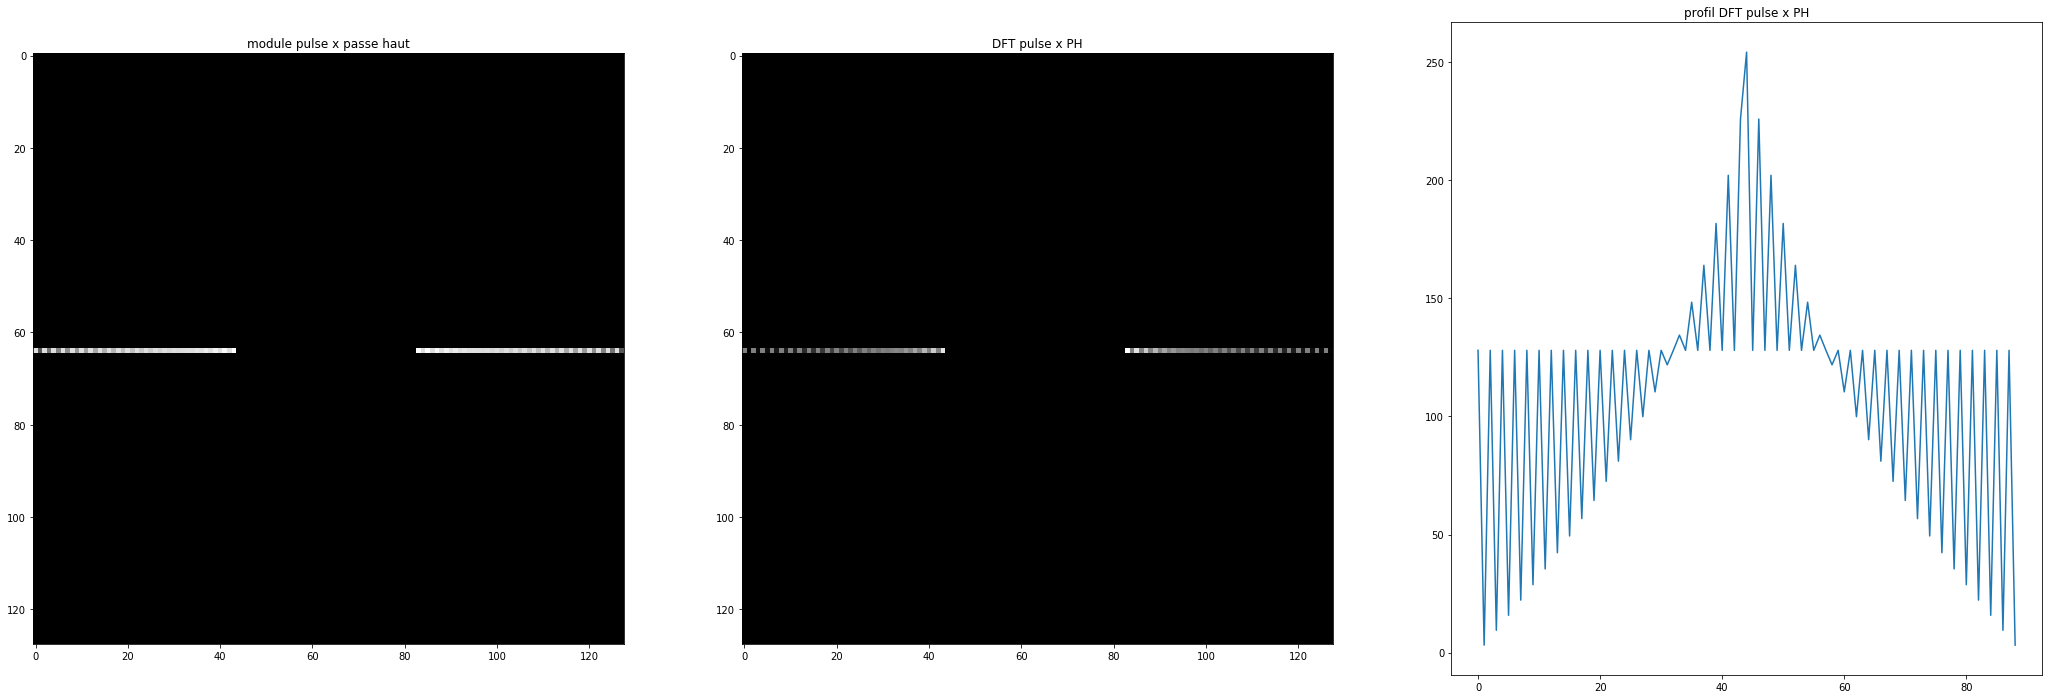

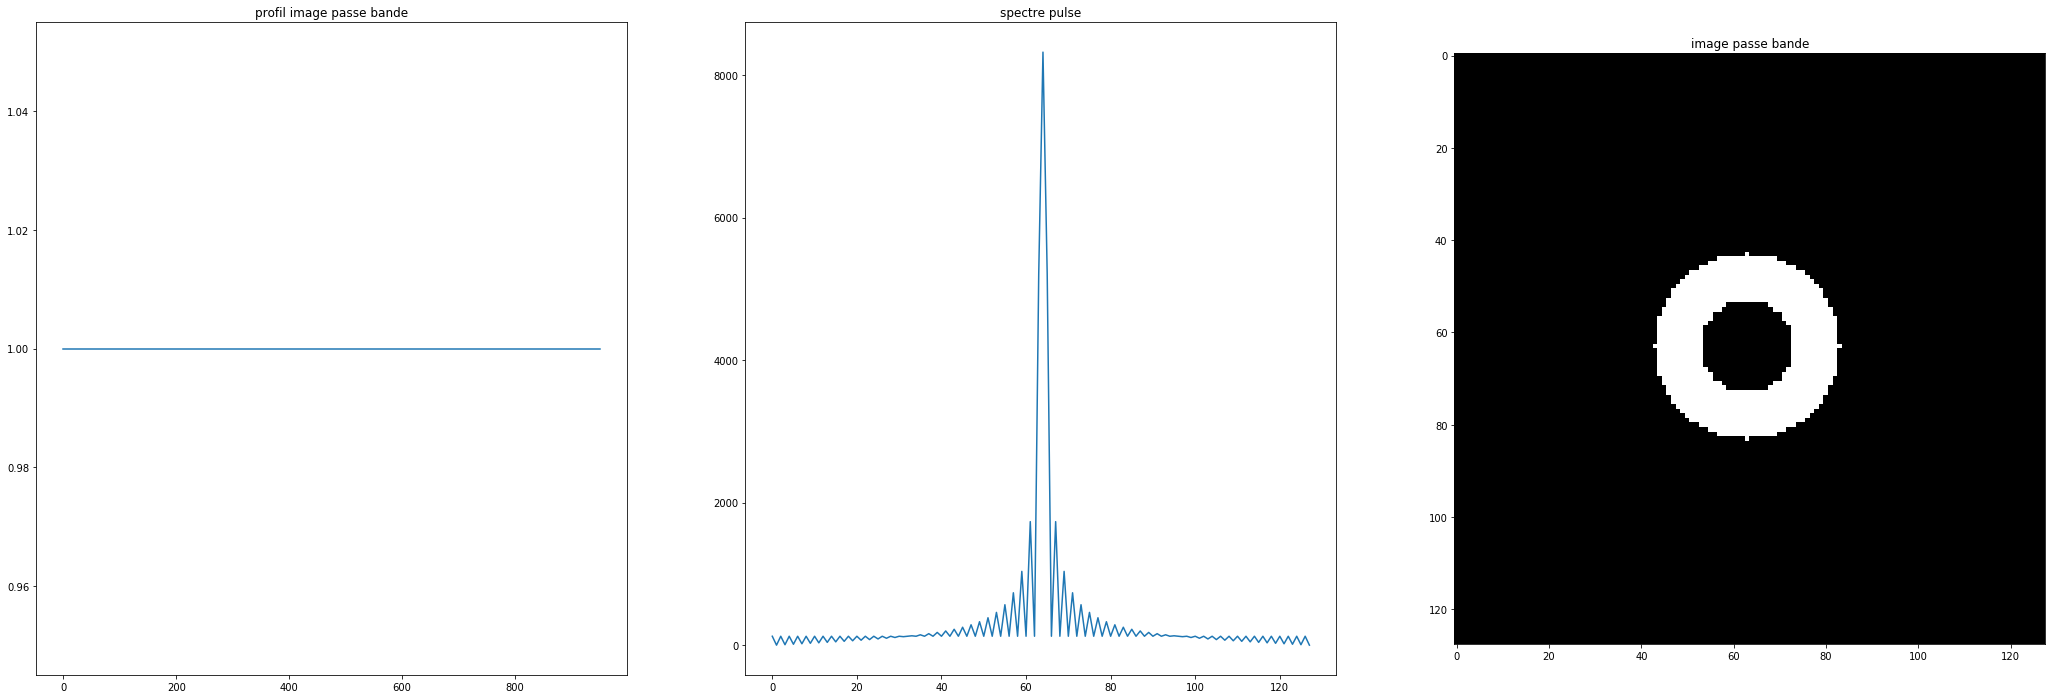

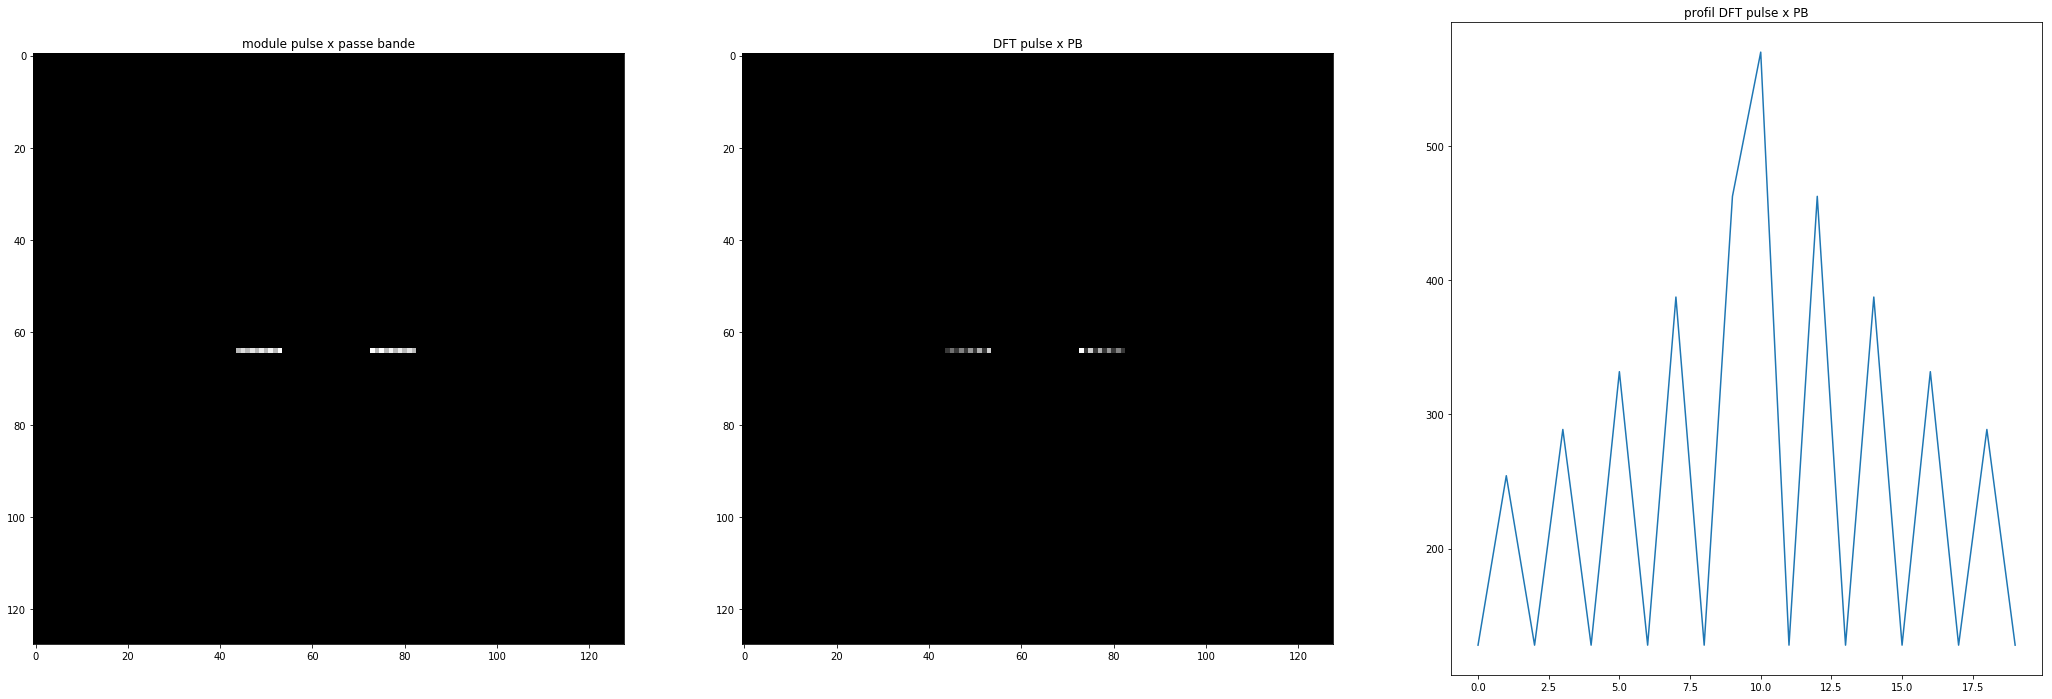

In [8]:
module_fft_pulse = module_fft_c(image_pulse)
affichage_14( [image_pulse, module_affichage(module_fft_pulse), module_fft_pulse[module_fft_pulse>0]], ['image pulse', 'image module DFT pulse', 'spectre pulse'])

# passe bas
affichage_14([image_passe_bas[image_passe_bas>0], module_fft_pulse[module_fft_pulse>0], image_passe_bas],['profil image passe bas','spectre pulse','image passe bas'])

#votre_code
A = module_fft_pulse*image_passe_bas
affichage_14([module_affichage(A), A, A[A>0]],['module pulse x passe bas', 'DFT pulse x PB', 'profil DFT pulse x PB'])

AA = fftshift(ifft2(A))
affichage_14([module_affichage(AA), AA[AA>0]],['inverse DFT pulse x PB', 'profil inverse DFT pulse x PB'])
 
# passe haut
B = module_fft_pulse*image_passe_haut
affichage_14([image_passe_haut[image_passe_haut>0], module_fft_pulse[module_fft_pulse>0], image_passe_haut],['profil image passe haut','spectre pulse','image passe haut'])


#votre_code
affichage_14([module_affichage(B), B, B[B>0]], ['module pulse x passe haut', 'DFT pulse x PH', 'profil DFT pulse x PH'])


# passe bande
C = module_fft_pulse*image_passe_bande
affichage_14([image_passe_bande[image_passe_bande>0], module_fft_pulse[module_fft_pulse>0], image_passe_bande],['profil image passe bande','spectre pulse','image passe bande'])


#votre_code
affichage_14([module_affichage(C), C, C[C>0]],['module pulse x passe bande', 'DFT pulse x PB', 'profil DFT pulse x PB'])


